In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import VAR # 이 부분이 중요합니다.

In [22]:
dataset = pd.read_excel("dataset2.xlsx", index_col=0)

df_diff1 = pd.read_excel("df_diff1.xlsx", index_col=0)
df_diff1

,경제성장률(전기대비),소비자물가총지수,매출액,수출,내수,연구개발비,소비자심리지수,실업률,가동률지수,환율,기준금리,ROE
분기,,,,,,,,,,,,
2010-Q2,5.3,0.006376,0.026607,0.046310,4.051848e+09,0.036034,1.330279e+06,-1.727682,8.734193,0.077285,-0.100791,0.144959
2010-Q3,4.7,0.007674,0.025917,0.044260,4.070968e+09,0.034781,1.202304e+06,0.669740,-7.147284,-0.069449,-0.010370,-0.082396
2010-Q4,5.1,0.004968,0.025262,0.042383,4.090088e+09,0.033612,1.261627e+06,-0.326992,10.201434,-0.004747,-0.106948,-0.028674
2011-Q1,4.7,0.018651,0.024640,0.040660,4.109208e+09,0.032519,7.949268e+05,0.250791,-6.255393,-0.034151,0.132769,0.062915
2011-Q2,4.1,0.007751,0.163840,0.176029,4.112749e+09,0.225035,8.888495e+05,-0.832331,7.528215,-0.026799,-0.031026,0.069889
2011-Q3,4.2,0.010880,-0.083261,0.149632,4.116289e+09,0.230904,7.543635e+05,-0.070651,-7.768618,0.098396,-0.020966,-0.215450
2011-Q4,4.4,0.001590,0.200461,0.130129,4.119830e+09,0.212965,7.846486e+05,-0.163070,10.048843,-0.023272,-0.050748,-0.038392
2012-Q1,4.7,0.009456,-0.122664,-0.151879,3.856838e+09,-0.459510,8.805144e+05,0.163070,-5.609436,-0.015762,0.010799,0.180640
2012-Q2,4.1,0.002075,0.060829,0.030299,4.324638e+09,0.142841,8.450169e+05,-0.232191,1.969684,0.010536,-0.016222,0.004795


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw

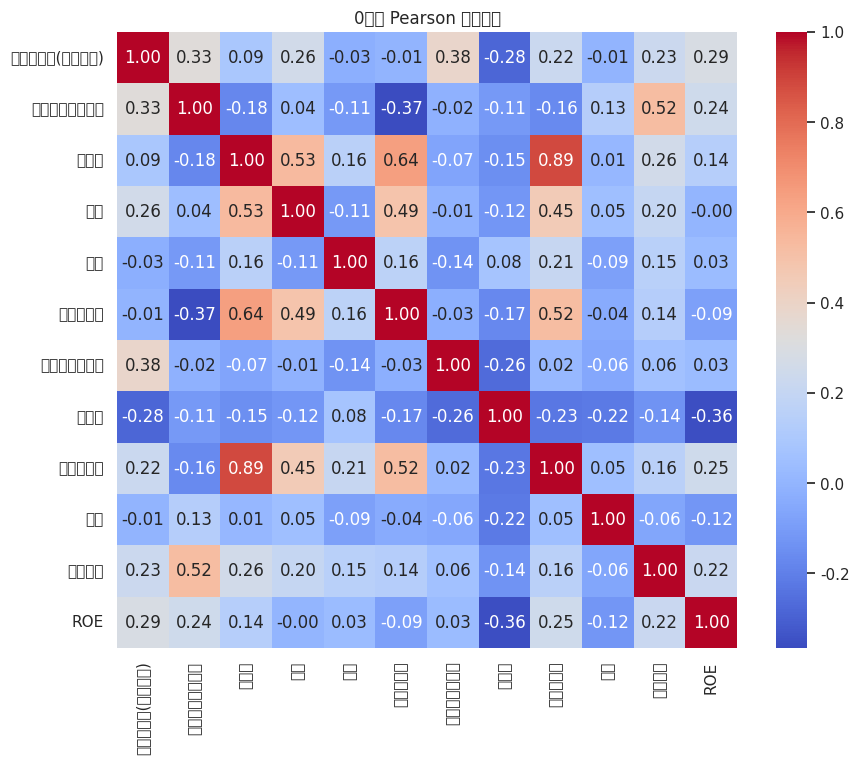

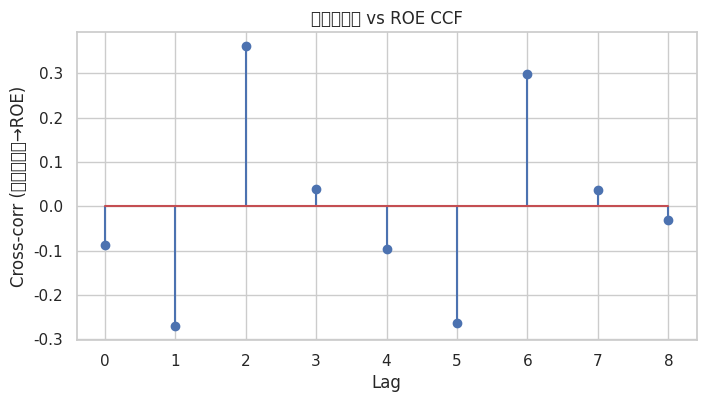

모든 변수 쌍의 최대 절대 Cross‐Correlation (lags=-4..4)
            경제성장률(전기대비) 소비자물가총지수    매출액     수출     내수  연구개발비 소비자심리지수    실업률  \
경제성장률(전기대비)         NaN    0.331 -0.178  0.256 -0.152   0.09   0.461 -0.333   
소비자물가총지수          0.331      NaN  0.429  0.322   0.17 -0.462   0.154 -0.359   
매출액              -0.178    0.429    NaN  0.531 -0.237 -0.751   0.173 -0.263   
수출                0.256    0.322  0.531    NaN  0.239  0.489    0.18 -0.272   
내수               -0.152     0.17 -0.237  0.239    NaN -0.208  -0.271  0.115   
연구개발비              0.09   -0.462 -0.751  0.489 -0.208    NaN   0.112 -0.209   
소비자심리지수           0.461    0.154  0.173   0.18 -0.271  0.112     NaN -0.264   
실업률              -0.333   -0.359 -0.263 -0.272  0.115 -0.209  -0.264    NaN   
가동률지수             0.223    0.438  0.886  0.454 -0.246 -0.724    0.17  0.295   
환율               -0.136    0.134 -0.208  0.097  0.175  0.238  -0.197 -0.221   
기준금리              0.254    0.523  0.256 -0.209  0.152 -0.237   -0.21 -0.281   
ROE   

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import ccf

# 2. 0시차 Pearson 상관계수 히트맵
corr0 = df_diff1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr0, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("0시차 Pearson 상관계수")
plt.show()

# 3. 특정 변수 쌍의 Cross-Correlation Function (CCF) 그리기
var_x = "연구개발비"   # 선행 변수 후보
var_y = "매출액"        # 후행 변수 후보
max_lag = 8          # 확인할 최대 lag

# statsmodels의 ccf는 lag ≥ 0만 반환하므로, 양(0~max_lag) 시차만 먼저 확인
ccf_vals = ccf(df_diff1[var_x], df_diff1[var_y], adjusted=True)[:max_lag+1]
lags = np.arange(0, max_lag+1)

plt.figure(figsize=(8,4))
plt.stem(lags, ccf_vals)
plt.xlabel("Lag")
plt.ylabel(f"Cross-corr ({var_x}→{var_y})")
plt.title(f"{var_x} vs {var_y} CCF")
plt.show()

# 4. 모든 변수 쌍에 대해 lag 범위 내 최대 절대 cross‐correlation 요약
max_lag = 4
lags = range(-max_lag, max_lag+1)
summary = pd.DataFrame(index=df_diff1.columns, columns=df_diff1.columns)

for i in df_diff1.columns:
    for j in df_diff1.columns:
        if i == j:
            summary.loc[i, j] = np.nan
        else:
            vals = [df_diff1[i].corr(df_diff1[j].shift(lag)) for lag in lags]
            summary.loc[i, j] = round(max(vals, key=abs), 3)

print("모든 변수 쌍의 최대 절대 Cross‐Correlation (lags=-4..4)")
print(summary)


In [24]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 2. VIF 계산을 위해 상수항(constant) 추가
X = add_constant(df_diff1)

# 3. 각 변수(feature)의 VIF 계산
vif_data = pd.DataFrame({
    "feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i)
            for i in range(X.shape[1])]
})

print(vif_data)


        feature        VIF
0         const  71.177028
1   경제성장률(전기대비)   1.702976
2      소비자물가총지수   2.434236
3           매출액   7.446458
4            수출   1.819323
5            내수   1.268970
6         연구개발비   2.452715
7       소비자심리지수   1.404398
8           실업률   1.519715
9         가동률지수   6.345178
10           환율   1.224311
11         기준금리   2.035010
12          ROE   1.533499


In [19]:
df_diff1 = df_diff1.drop(columns=['가동률지수'])


In [32]:
# 2. VIF 계산을 위해 상수항(constant) 추가
X = add_constant(df_diff1)

# 3. 각 변수(feature)의 VIF 계산
vif_data = pd.DataFrame({
    "feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i)
            for i in range(X.shape[1])]
})

print(vif_data)

        feature        VIF
0         const  71.177028
1   경제성장률(전기대비)   1.702976
2      소비자물가총지수   2.434236
3           매출액   7.446458
4            수출   1.819323
5            내수   1.268970
6         연구개발비   2.452715
7       소비자심리지수   1.404398
8           실업률   1.519715
9         가동률지수   6.345178
10           환율   1.224311
11         기준금리   2.035010
12          ROE   1.533499


In [33]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# ✅ 분석할 변수 리스트
selected_variables_new = ['경제성장률(전기대비)', '소비자물가총지수', '매출액', '수출', '내수',
                          '연구개발비', '소비자심리지수', '실업률', '환율', '기준금리', 'ROE']

# ✅ 차분된 데이터프레임 사용
df = df_diff1[selected_variables_new]

# ✅ lag 설정
max_lag = 2
target = '매출액'

# ✅ 결과 저장용 리스트
results = []

# ✅ Granger 인과관계 검정 수행
for col in df.columns:
    if col == target:
        continue
    test_result = grangercausalitytests(df[[target, col]], maxlag=max_lag, verbose=False)
    p_val = test_result[max_lag][0]['ssr_chi2test'][1]

    interpretation = '인과관계 존재' if p_val < 0.05 else '인과관계 없음'
    results.append({
        '원인 변수': col,
        '결과 변수': target,
        'p-value': round(p_val, 4),
        '해석 (5% 유의수준)': interpretation
    })

# ✅ 결과를 데이터프레임으로 정리
granger_df = pd.DataFrame(results)
display(granger_df)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

,원인 변수,결과 변수,p-value,해석 (5% 유의수준)
0,경제성장률(전기대비),매출액,0.2086,인과관계 없음
1,소비자물가총지수,매출액,0.1165,인과관계 없음
2,수출,매출액,0.5733,인과관계 없음
3,내수,매출액,0.5143,인과관계 없음
4,연구개발비,매출액,0.0001,인과관계 존재
5,소비자심리지수,매출액,0.0486,인과관계 존재
6,실업률,매출액,0.8586,인과관계 없음
7,환율,매출액,0.4421,인과관계 없음
8,기준금리,매출액,0.5157,인과관계 없음
9,ROE,매출액,0.2355,인과관계 없음


In [40]:
df3 = df_diff1[['연구개발비','매출액','경제성장률(전기대비)']]
# 1) VAR 모델 객체 생성
var_mod3 = VAR(df3)

# 2) lag 0으로 적합
#    trend='c' → 상수항 포함, 필요 없으면 'n'
var_res3 = var_mod3.fit(
    maxlags=2,   # 또는 fit(0) 도 가능
    trend='c'    # 'c': constant, 'nc': no constant
)


lag_order_results = var_mod3.select_order(maxlags=2)
print(lag_order_results.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -7.272      -7.165   0.0006946      -7.230
1      -8.377      -7.947   0.0002302      -8.210
2     -9.378*     -8.625*  8.491e-05*     -9.085*
-------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [41]:
df3 = df_diff1[['연구개발비','매출액','소비자물가총지수']]
# 1) VAR 모델 객체 생성
var_mod3 = VAR(df3)

# 2) lag 0으로 적합
#    trend='c' → 상수항 포함, 필요 없으면 'n'
var_res3 = var_mod3.fit(
    maxlags=2,   # 또는 fit(0) 도 가능
    trend='c'    # 'c': constant, 'nc': no constant
)


lag_order_results = var_mod3.select_order(maxlags=2)
print(lag_order_results.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -17.32      -17.22   2.993e-08      -17.28
1      -18.74      -18.31   7.304e-09      -18.57
2     -19.73*     -18.98*  2.708e-09*     -19.44*
-------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [42]:
df3 = df_diff1[['연구개발비','매출액','소비자심리지수']]
# 1) VAR 모델 객체 생성
var_mod3 = VAR(df3)

# 2) lag 0으로 적합
#    trend='c' → 상수항 포함, 필요 없으면 'n'
var_res3 = var_mod3.fit(
    maxlags=2,   # 또는 fit(0) 도 가능
    trend='c'    # 'c': constant, 'nc': no constant
)


lag_order_results = var_mod3.select_order(maxlags=2)
print(lag_order_results.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       17.60       17.71   4.406e+07       17.64
1       15.94       16.37   8.408e+06       16.11
2      15.11*      15.87*  3.673e+06*      15.41*
-------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [43]:
df3 = df_diff1[['연구개발비','매출액','환율']]
# 1) VAR 모델 객체 생성
var_mod3 = VAR(df3)

# 2) lag 0으로 적합
#    trend='c' → 상수항 포함, 필요 없으면 'n'
var_res3 = var_mod3.fit(
    maxlags=2,   # 또는 fit(0) 도 가능


lag_order_results = var_mod3.select_order(maxlags=2)
print(lag_order_results.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -12.77      -12.66   2.849e-06      -12.73
1      -14.08      -13.65   7.712e-07      -13.91
2     -14.91*     -14.16*  3.364e-07*     -14.62*
-------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [44]:
df3 = df_diff1[['연구개발비','매출액','ROE']]
# 1) VAR 모델 객체 생성
var_mod3 = VAR(df3)

# 2) lag 0으로 적합
#    trend='c' → 상수항 포함, 필요 없으면 'n'
var_res3 = var_mod3.fit(
    maxlags=2,   # 또는 fit(0) 도 가능
    trend='c'    # 'c': constant, 'nc': no constant
)


lag_order_results = var_mod3.select_order(maxlags=2)
print(lag_order_results.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -8.338      -8.231   0.0002391      -8.297
1      -9.549      -9.119   7.132e-05      -9.382
2     -10.67*     -9.914*  2.339e-05*     -10.37*
-------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
